In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('/content/sample_data/wine_fraud.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df['quality'].value_counts()

,count
quality,
Legit,6251
Fraud,246


In [6]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='count', ylabel='quality'>

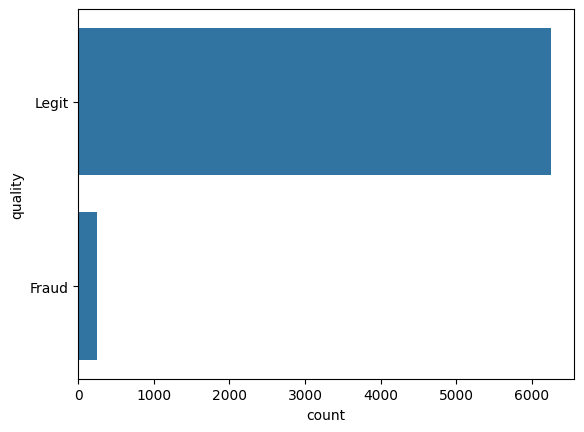

In [7]:
sns.countplot(df['quality'])

<Axes: xlabel='type', ylabel='count'>

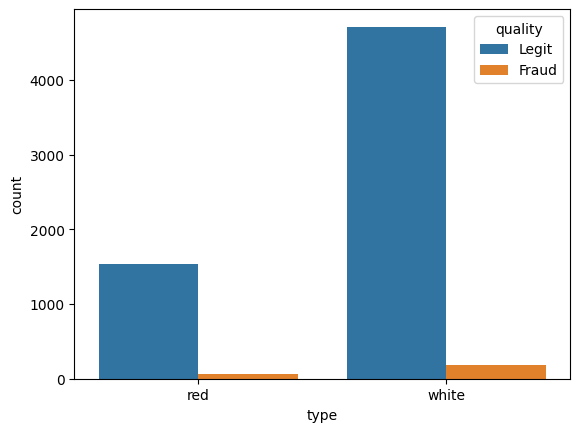

In [14]:
sns.countplot(data=df,x='type',hue='quality')

In [26]:
red = df[df['type']=='red']
red_fraud = red[red['quality']=='Fraud']
red_fraud_prop = 100*len(red_fraud)/len(red)
red_fraud_prop

3.9399624765478425

In [27]:
white = df[df['type']=='white']
white_fraud = white[white['quality']=='Fraud']
white_fraud_prop =100*len(white_fraud)/len(white)
white_fraud_prop

3.736218864842793

In [28]:
df['qual_bin'] = df['quality'].map({'Legit':0,'Fraud':1})

In [29]:
df = df.drop('quality',axis=1)

In [32]:
df['type_bin'] = df['type'].map({'red':0,'white':1})
df = df.drop('type',axis=1)

In [35]:
df.corr()['qual_bin']

,qual_bin
fixed acidity,0.021794
volatile acidity,0.151228
citric acid,-0.061789
residual sugar,-0.048756
chlorides,0.034499
free sulfur dioxide,-0.085204
total sulfur dioxide,-0.035252
density,0.016351
pH,0.020107
sulphates,-0.034046


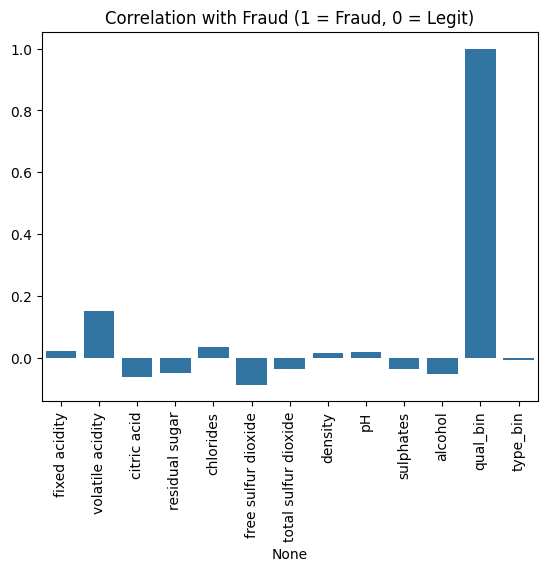

In [41]:
sns.barplot(x=df.corr()['qual_bin'].index, y=df.corr()['qual_bin'].values)
plt.xticks(rotation=90)
plt.title('Correlation with Fraud (1 = Fraud, 0 = Legit)')
plt.show()

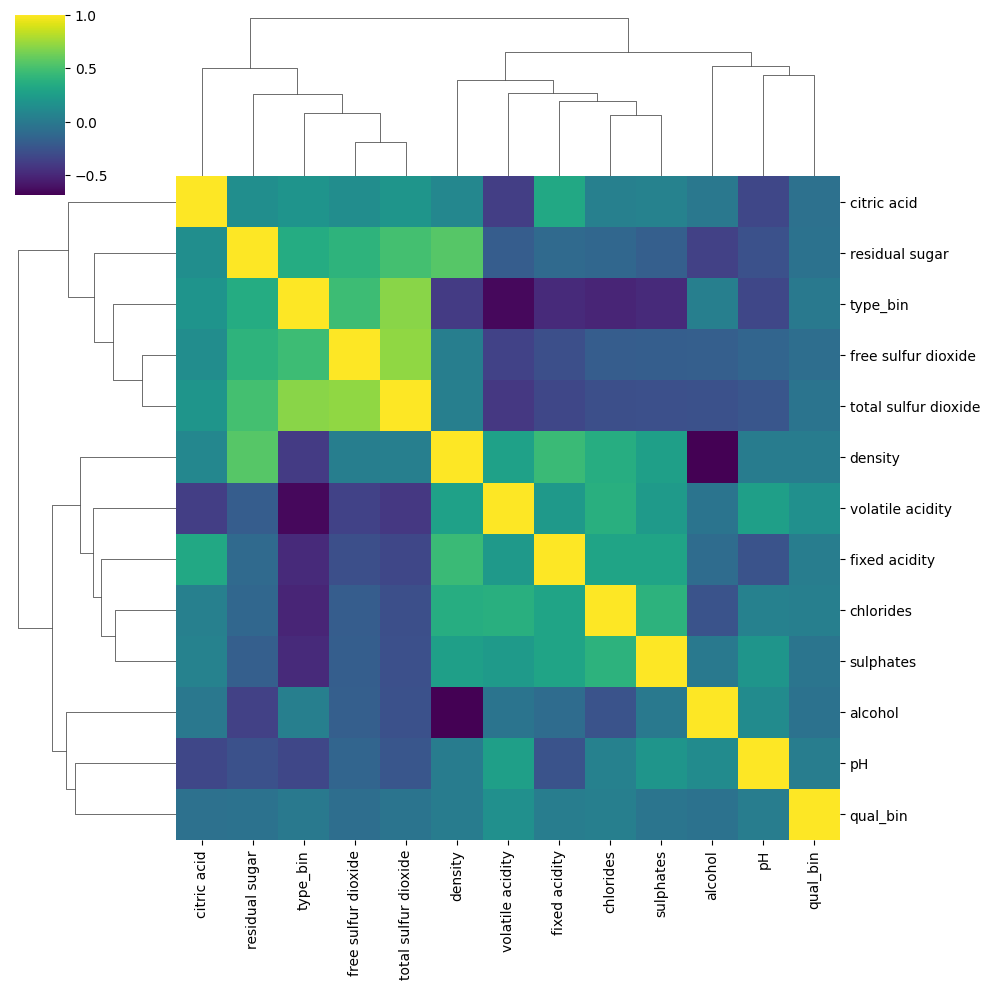

In [43]:
sns.clustermap(df.corr(),cmap='viridis')

In [59]:
X = df.drop('qual_bin',axis=1)
y = df['qual_bin']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [62]:
from sklearn.svm import SVC, LinearSVR

In [65]:
model = SVC(class_weight='balanced')

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [69]:
grid = GridSearchCV(model,param_grid,verbose=3)

In [70]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.942 total time=   1.2s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.942 total time=   1.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.929 total time=   1.2s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.938 total time=   0.8s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.947 total time=   1.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.822 total time=   0.8s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.809 total time=   0.6s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.825 total time=   0.6s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.808 total time=   0.6s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.833 total time=   0.6s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.803 total time=   0.7s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [73]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
grid_preds = grid.predict(X_test_scaled)

In [76]:
confusion_matrix(y_test,grid_preds)

array([[620,   3],
       [ 24,   3]])

In [77]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       623
           1       0.50      0.11      0.18        27

    accuracy                           0.96       650
   macro avg       0.73      0.55      0.58       650
weighted avg       0.94      0.96      0.95       650

